<a href="https://colab.research.google.com/github/TaniaWaiganjo/Neural_Networks/blob/master/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()


Saving IMDB Dataset.csv to IMDB Dataset.csv


https://www.datacamp.com/tutorial/nlp-with-pytorch-a-comprehensive-guidehttps://www.datacamp.com/tutorial/nlp-with-pytorch-a-comprehensive-guide

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import re


import re is regular expression

specifies a set of strings that matches it

In [7]:
file_name = 'IMDB Dataset.csv'
df = pd.read_csv(file_name)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
X,y = df['review'].values,df['sentiment'].values
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y)

Exploratory data analysis.
train and test the review(y) and sentiment(x)

train data shape: (37500,)
test data shape: (12500,)


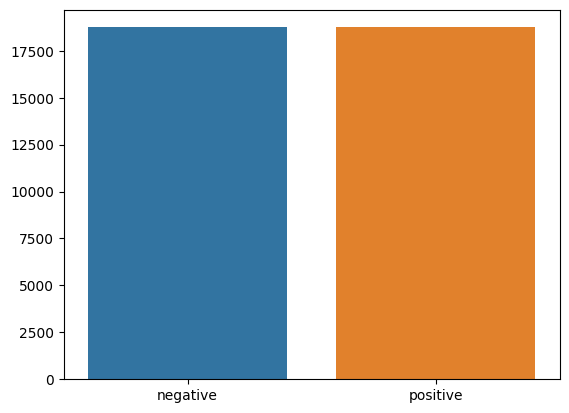

In [10]:
print(f'train data shape: {x_train.shape}')
print(f'test data shape: {x_test.shape}')

dd = pd.Series(y_train).value_counts()
sns.barplot(x=np.array(['negative','positive']),y=dd.values)
plt.show()

The output shows the shape of two datasets, one called "train data" and the other called "test data".

In [12]:
from collections import Counter
# text preprocessing

def preprocess_string(s) :
    # removes none words
    s = re.sub(r"[^\w\s]", '', s)
    # replace all whitespaces with no space
    s = re.sub(r"\s+",'', s)
    #replace digits with no space
    s = re.sub(r"\d", '', s)
    return s

def tokenize(x_train, y_train, x_val, y_val):
  word_list = []

  stop_words = set(stopwords.words('english'))
  for sent in x_train:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if word not in stop_words and word != '':
        word_list.append(word)

  corpus = Counter(word_list) # counts the frequency of each word in word-list

  # sort on basis of most common words
  # sorted function: (iterable, key=key, reverse=reverse)
  # key = functin to execute to decide the order
  # reverse = false sorts ascending, true descending. Default is false
  corpus_ = sorted(corpus,key=corpus.get,reverse=True) [:1000]
# words in corpus sorted by frequency for the firt 1000 words


  # create a dictionary that maps each word in corpus_ to an integer from 1
  # no freaking idea whats happening here
  onehot_dict = {w: i+1 for i,w in enumerate(corpus_)}

# Dict will be used to convert  each sentence in xtrain and xval to asequence of integers
  # create tokens
  final_list_train,final_list_test = [],[]
  for sent in x_train:
    final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                             if preprocess_string(word) in onehot_dict.keys()])

  for sent in x_val:
            final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split()
                                    if preprocess_string(word) in onehot_dict.keys()])

  encoded_train = [1 if label == 'positive' else 0 for label in y_train]
  encoded_test = [1 if label == 'positive' else 0 for label in y_val]

  x_train,y_train,x_test,y_test,vocab = tokenize(x_train,y_train,x_test,y_test)


<Axes: >

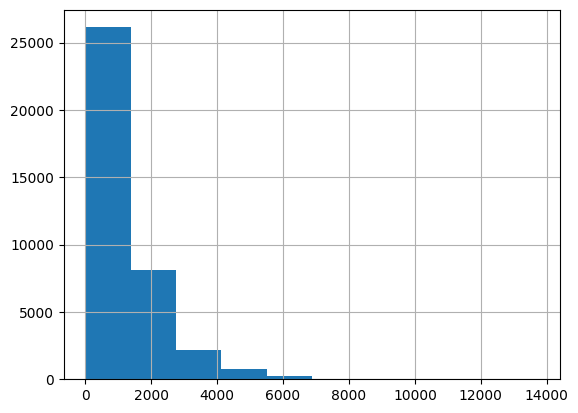

In [13]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
# histogram shows frequency of the length of each elemen tin x_train

From hist, you can see majority of reviews contain less than 500 tokens.
So establish 500 as the fixed length for all reviews.

In [14]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len), dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]
  return features

  x_train_pad = padding_(x_train,500)
  x_test_pad = padding_(x_test,500)

This code defines a function called padding_ that takes in two arguments: sentences and seq_len.
• The function creates a numpy array of zeros with dimensions (len(sentences), seq_len) and data type int.
• It then loops through each sentence in sentences and checks if the length of the sentence is not equal to zero.
• If the length is not zero, it takes the last seq_len elements of the sentence and assigns them to the corresponding row in the numpy array features.
• Finally, the function returns the features array.
• The code then calls the padding_ function twice, once with x_train and once with x_test, and assigns the resulting arrays to x_train_pad and x_test_pad, respectively.
• These arrays are used for padding the input sequences to a fixed length of 500